In [2]:
# Data
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/stocks.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,02/07/2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,02/08/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,02/09/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,02/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,02/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,218.671448,221.334984,216.124871,218.801028,218.782052,3.208210e+07
std,104.283265,105.219203,103.025609,104.084010,104.078275,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,246.974998,250.964996,245.669998,247.430000,247.430000,2.734000e+07
75%,304.697495,307.800011,297.000000,304.507492,304.507492,4.771772e+07
max,1000.350006,1000.000000,1000.850006,1000.550003,1000.550003,1.133164e+08


In [5]:
df.Ticker.value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

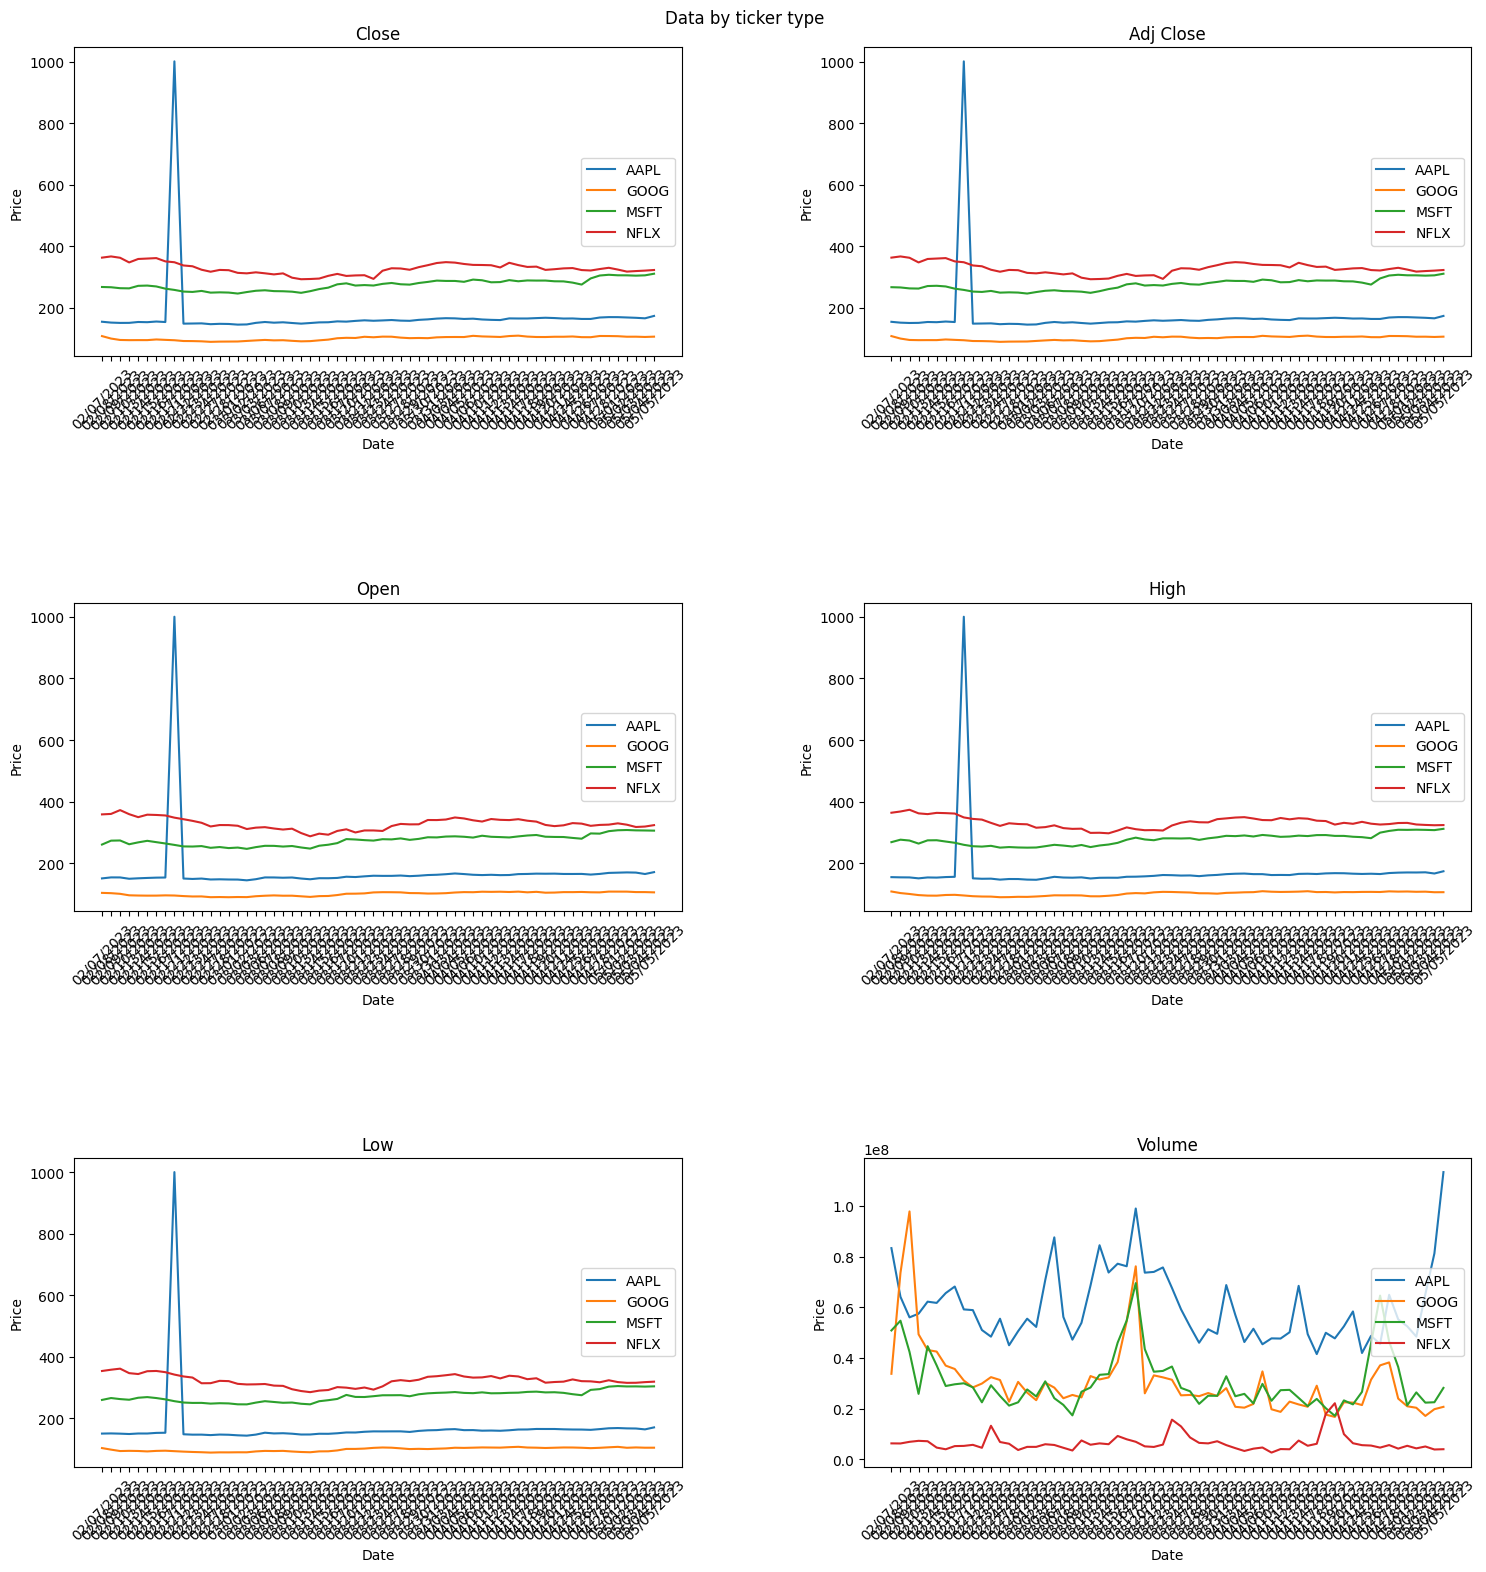

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')

cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    row = i // 2
    col = i % 2

    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)

    axs[row, col].set_title(cols[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()


In [7]:
df.dropna(subset=['Date', 'Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume'], inplace=True)

In [8]:
df.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)


In [24]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Close'] >= (Q1 - 1.5 * IQR)) & (df['Close'] <= (Q3 + 1.5 * IQR))]


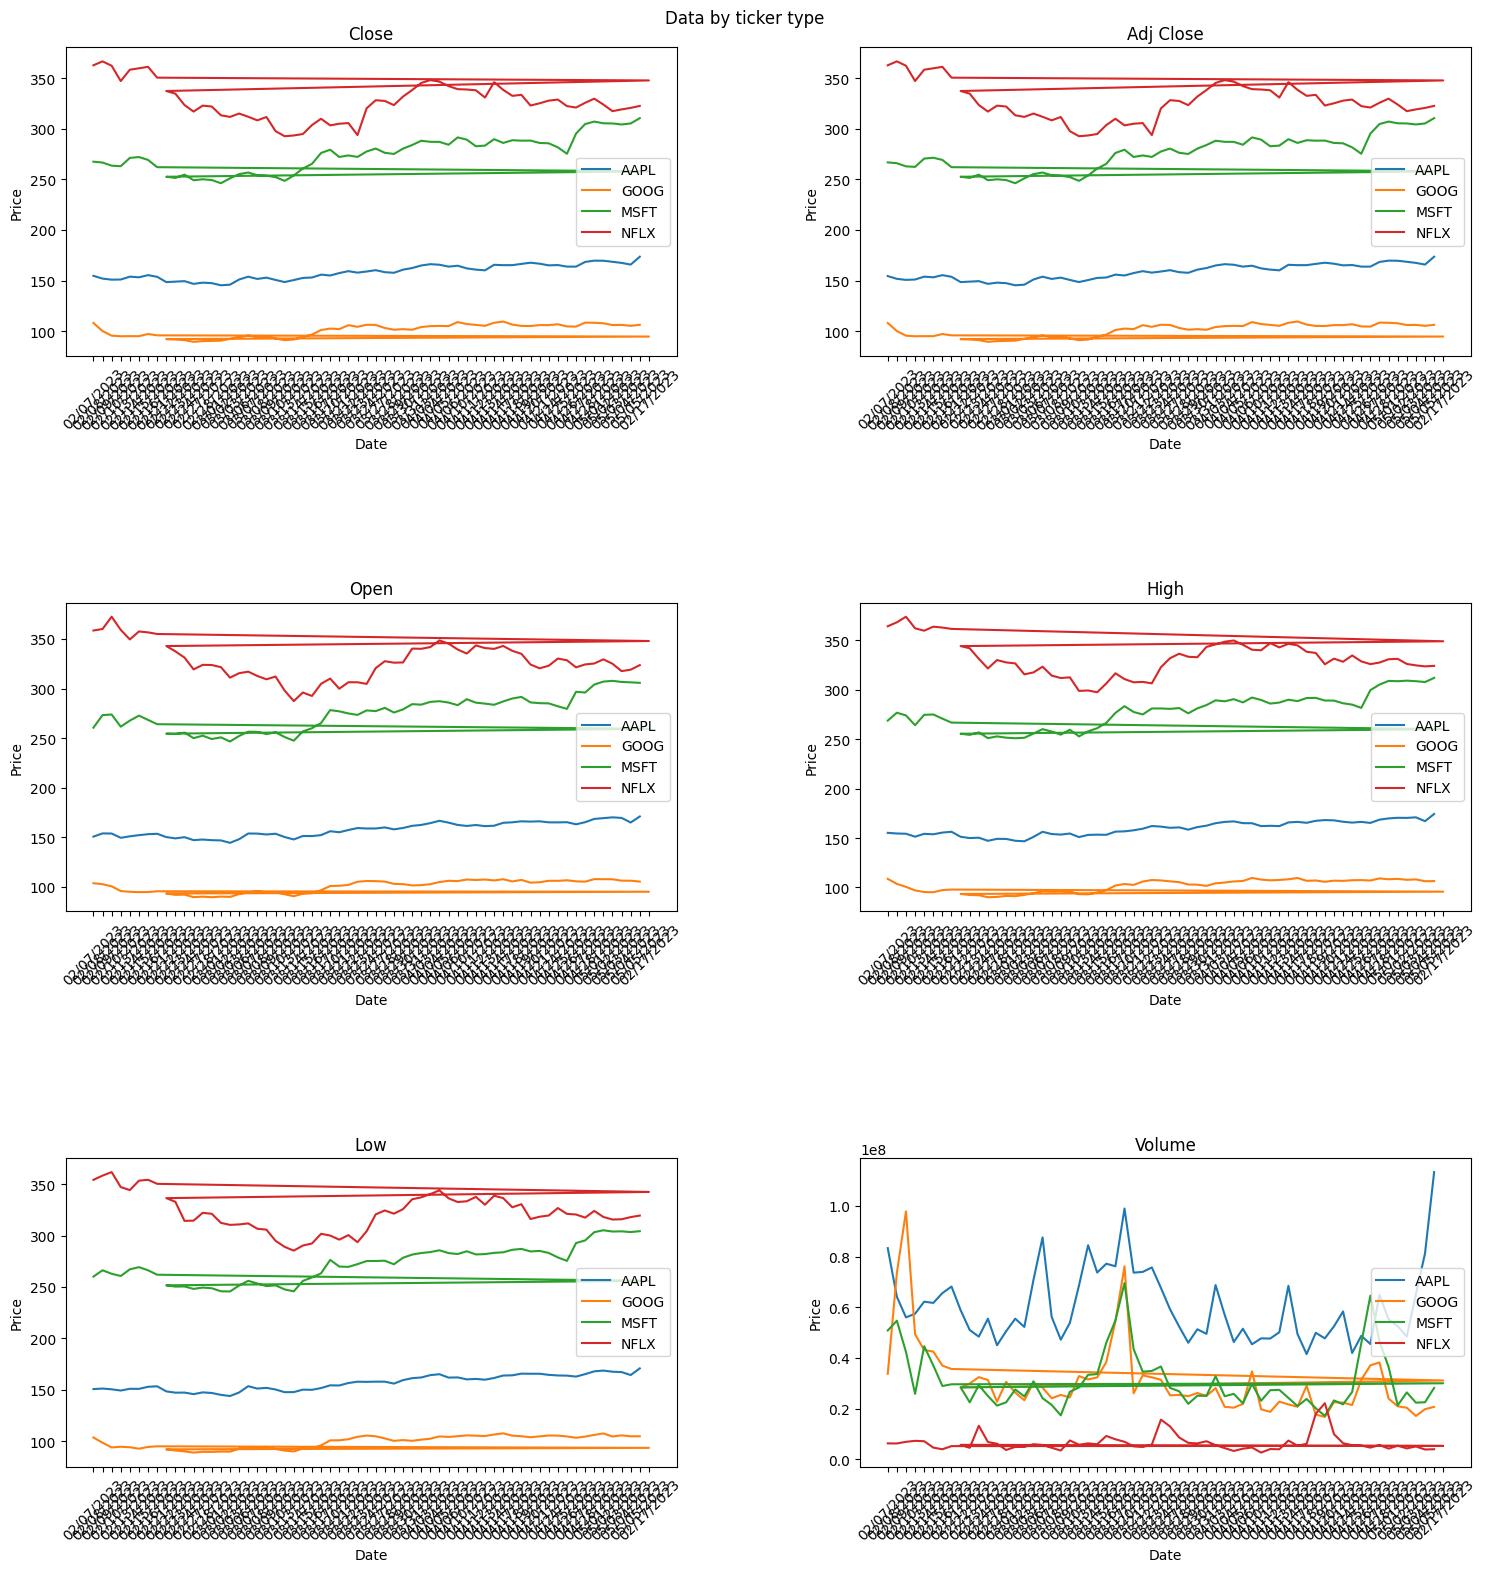

In [25]:

fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')

cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    row = i // 2
    col = i % 2

    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)

    axs[row, col].set_title(cols[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()


In [11]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [15]:
X
y

array([362.9500122, 366.8299866, 362.5      , 347.3599854, 358.5700073,
       359.9599915, 361.4200134, 350.7099915, 347.9599915, 337.5      ,
       334.8800049, 323.6499939, 317.1499939, 323.0299988, 322.1300049,
       313.480011 , 311.8800049, 315.1799927, 312.0299988, 308.4700012,
       311.7900085, 297.7799988, 292.7600098, 293.5100098, 294.9400024,
       303.7900085, 310.0599976, 303.5      , 305.1300049, 305.7900085,
       293.8999939, 320.3699951, 328.3900146, 327.6600037, 323.519989 ,
       332.0299988, 338.4299927, 345.480011 , 348.2799988, 346.75     ,
       342.3500061, 339.3299866, 338.9899902, 338.2099915, 331.0299988,
       346.1900024, 338.6300049, 332.7200012, 333.7000122, 323.1199951,
       325.3500061, 327.980011 , 329.019989 , 322.5499878, 321.1499939,
       325.8500061, 329.9299927, 324.1199951, 317.5499878, 319.2999878,
       320.7799988, 322.7600098])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [23]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,297.779999,299.664031
1,329.019989,330.817816
2,348.279999,345.511084
3,294.940002,292.282883
4,362.500000,366.624667
5,339.329987,335.179462
6,320.779999,320.912915
7,325.350006,327.409741
8,332.029999,330.613219
9,331.029999,334.067291


<Axes: >

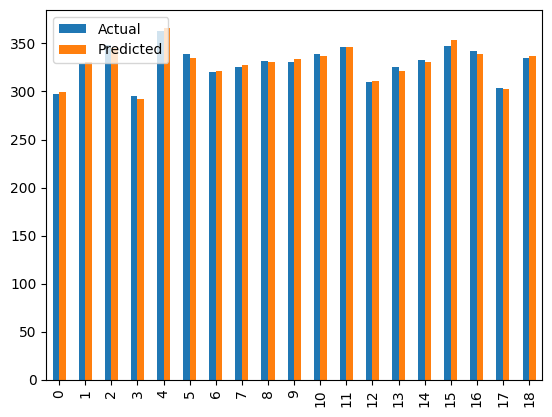

In [20]:
graph = data1.head(20)
graph.plot(kind='bar')